In [67]:
import random
import math

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import tree
import joblib

import scipy

In [4]:
plt.rcParams["figure.figsize"] = (15, 10)

## load random forest model

In [5]:
filename_min = './min_random_forest_model.sav'
filename_max = './max_random_forest_model.sav'

In [6]:
rfr_min = joblib.load(filename_min)
rfr_max = joblib.load(filename_max)

## create test data

In [7]:
n_sample = 10

In [8]:
pth_data = '../../data/train.csv'
df_origin = pd.read_csv(pth_data)

In [9]:
df_origin.shape

(2796, 16)

In [10]:
df_nona = df_origin.dropna()

In [11]:
df_nona.shape

(1349, 16)

In [12]:
df_comfort = df_nona[df_nona['TS'] > 4.0]

In [13]:
df_data = df_comfort

In [14]:
df_data

,time,height,weight,gender,bmi,age,env_temp,rh,heart_rate,stress_level,skin_temp,eda,TC,TS,Clo,Act
65,2020-10-21 17:30:00,1.64,54.0,1,20.077335,24,78.165,60.688,73.0,15.0,32.370,0.240481,5.0,5.0,1.00,0.8
66,2020-10-21 18:00:00,1.64,54.0,1,20.077335,24,77.684,60.828,61.0,0.0,32.111,0.263069,6.0,7.0,1.00,0.8
67,2020-10-21 18:30:00,1.64,54.0,1,20.077335,24,77.247,61.183,57.0,5.0,32.033,0.261908,6.0,7.0,1.00,0.8
68,2020-10-21 19:00:00,1.64,54.0,1,20.077335,24,76.942,61.457,72.5,1.0,32.344,0.264096,6.0,7.0,1.00,0.8
70,2020-10-21 20:00:00,1.64,54.0,1,20.077335,24,77.378,62.697,69.0,6.0,31.667,0.220582,4.0,5.0,0.74,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,2020-10-28 16:30:00,1.71,64.0,-1,21.887076,27,76.876,44.830,71.0,42.0,32.707,0.063248,4.0,5.0,0.61,1.0
2684,2020-10-28 17:00:00,1.71,64.0,-1,21.887076,27,77.050,44.770,72.0,28.5,33.482,0.058099,4.0,5.0,0.61,1.1
2686,2020-10-28 18:00:00,1.71,64.0,-1,21.887076,27,76.703,43.210,68.5,14.0,30.960,0.073315,4.0,5.0,0.61,1.1
2688,2020-10-28 19:00:00,1.71,64.0,-1,21.887076,27,76.876,44.800,84.0,69.0,31.458,0.080913,4.0,5.0,0.61,1.0


### dataset allowing different rh

In [15]:
df_sample_n = df_data.sample(n_sample, random_state=2020)

In [16]:
df_sample_n

,time,height,weight,gender,bmi,age,env_temp,rh,heart_rate,stress_level,skin_temp,eda,TC,TS,Clo,Act
447,2020-10-21 14:00:00,1.80,75.0,-1,23.148148,33,80.911,46.560,63.5,4.0,33.507,0.042916,4.0,5.0,0.31,0.8
619,2020-10-21 00:00:00,1.83,74.0,-1,22.096808,24,79.502,51.870,69.5,8.0,33.096,0.019086,4.0,6.0,0.50,1.0
1624,2020-10-25 19:30:00,1.69,75.0,-1,26.259585,24,77.050,44.520,80.0,11.0,32.215,0.003182,4.0,5.0,0.36,1.1
992,2020-10-23 18:30:00,1.62,56.0,1,21.338211,24,76.811,58.735,73.0,12.0,32.526,0.032571,4.0,6.0,0.61,1.0
745,2020-10-19 19:30:00,1.74,65.0,-1,21.469150,23,79.678,52.960,67.0,22.0,33.456,0.224634,6.0,6.0,0.54,0.8
750,2020-10-19 22:00:00,1.74,65.0,-1,21.469150,23,81.621,52.360,67.0,30.0,32.396,0.052424,4.0,6.0,0.36,1.0
663,2020-10-19 18:30:00,1.69,75.0,-1,26.259585,24,80.382,56.700,109.0,87.0,32.707,0.010796,4.0,5.0,0.31,1.0
1625,2020-10-25 20:00:00,1.69,75.0,-1,26.259585,24,77.050,45.110,86.0,8.0,32.578,0.003982,4.0,5.0,0.36,1.1
1692,2020-10-24 14:00:00,1.71,64.0,-1,21.887076,27,77.574,56.960,75.0,14.0,32.163,0.016780,5.0,5.0,0.50,1.0
2576,2020-10-28 22:00:00,1.69,75.0,-1,26.259585,24,77.050,38.800,71.0,8.0,33.070,0.002383,4.0,5.0,0.67,1.0


In [17]:
y_sample = df_sample_n['env_temp']

In [18]:
X_sample = df_sample_n[['height', 'weight', 'gender', 'bmi', 'age', 'rh', \
                      'heart_rate', 'stress_level', 'skin_temp', 'eda', \
                      'Clo', 'Act']]

### dataset with same rh

In [19]:
df_rh_round = df_data.round({'rh': 0})

In [20]:
df_rh_round.shape

(384, 16)

In [21]:
df_rh_round.head()

,time,height,weight,gender,bmi,age,env_temp,rh,heart_rate,stress_level,skin_temp,eda,TC,TS,Clo,Act
65,2020-10-21 17:30:00,1.64,54.0,1,20.077335,24,78.165,61.0,73.0,15.0,32.370,0.240481,5.0,5.0,1.00,0.8
66,2020-10-21 18:00:00,1.64,54.0,1,20.077335,24,77.684,61.0,61.0,0.0,32.111,0.263069,6.0,7.0,1.00,0.8
67,2020-10-21 18:30:00,1.64,54.0,1,20.077335,24,77.247,61.0,57.0,5.0,32.033,0.261908,6.0,7.0,1.00,0.8
68,2020-10-21 19:00:00,1.64,54.0,1,20.077335,24,76.942,61.0,72.5,1.0,32.344,0.264096,6.0,7.0,1.00,0.8
70,2020-10-21 20:00:00,1.64,54.0,1,20.077335,24,77.378,63.0,69.0,6.0,31.667,0.220582,4.0,5.0,0.74,1.0


In [22]:
df_sortby_rh = df_rh_round.sort_values(by="rh")

In [23]:
rh_unique = df_sortby_rh.rh.unique()

In [24]:
rh_unique

array([24., 25., 26., 27., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])

In [25]:
df_sortby_rh.shape

(384, 16)

In [26]:
df_candidate = None
random.seed(1000)
for i in range(20):
    rh_idx = random.randint(0, len(rh_unique))
    rh_value = rh_unique[rh_idx]
    print(rh_value)
    df_maybe = df_sortby_rh[df_sortby_rh.rh == rh_value]
    print('----------------------', df_maybe.shape[0])
    if  df_maybe.shape[0] >= n_sample:
        df_candidate = df_maybe
        break

53.0
---------------------- 13


In [27]:
df_sample_n = df_candidate.sample(n_sample, random_state=2020)

In [28]:
df_sample_n

,time,height,weight,gender,bmi,age,env_temp,rh,heart_rate,stress_level,skin_temp,eda,TC,TS,Clo,Act
1695,2020-10-24 15:30:00,1.71,64.0,-1,21.887076,27,77.5740,53.0,72.0,5.0,31.117,0.038182,5.0,5.0,0.50,1.0
746,2020-10-19 20:00:00,1.74,65.0,-1,21.469150,23,79.6780,53.0,64.0,19.0,33.456,0.789816,6.0,6.0,0.54,0.8
744,2020-10-19 19:00:00,1.74,65.0,-1,21.469150,23,79.5020,53.0,64.0,15.0,33.070,0.052126,5.0,7.0,0.54,0.8
1707,2020-10-24 21:30:00,1.71,64.0,-1,21.887076,27,77.5740,53.0,79.0,37.0,32.215,0.025171,5.0,5.0,0.50,1.0
1633,2020-10-23 00:00:00,1.71,64.0,-1,21.887076,27,78.3615,53.0,74.0,16.0,31.615,0.070804,4.0,7.0,0.36,1.0
815,2020-10-19 10:30:00,1.63,50.0,1,18.818924,23,82.6860,53.0,89.0,59.0,31.667,0.010611,4.0,6.0,0.31,1.1
670,2020-10-19 22:00:00,1.69,75.0,-1,26.259585,24,80.3820,53.0,68.5,54.0,32.267,0.007078,3.0,6.0,0.31,1.0
1290,2020-10-23 16:00:00,1.67,56.0,1,20.079601,26,76.8760,53.0,88.5,43.0,30.563,0.890885,4.0,6.0,0.36,1.1
1635,2020-10-23 01:00:00,1.71,64.0,-1,21.887076,27,78.4490,53.0,74.0,13.0,31.719,0.118819,4.0,6.0,0.36,1.0
1634,2020-10-23 00:30:00,1.71,64.0,-1,21.887076,27,78.4490,53.0,72.0,7.0,31.484,0.057165,4.0,7.0,0.36,1.0


In [29]:
y_sample = df_sample_n['env_temp']

In [30]:
y_real = list(y_sample)

In [31]:
y_real

[77.574,
 79.678,
 79.502,
 77.574,
 78.3615,
 82.686,
 80.382,
 76.876,
 78.449,
 78.449]

In [32]:
X_sample = df_sample_n[['height', 'weight', 'gender', 'bmi', 'age', 'rh', \
                      'heart_rate', 'stress_level', 'skin_temp', 'eda', \
                      'Clo', 'Act']]

## predict

### predict comfort zone min value

In [33]:
y_pred_min = rfr_min.predict(X_sample)

In [34]:
y_pred_min

array([75.41890462, 76.90651   , 76.78979743, 76.04863435, 75.61638615,
       77.36405333, 77.74946571, 74.75103429, 75.45270002, 75.30253429])

### predict comfort zone max value

In [35]:
y_pred_max = rfr_max.predict(X_sample)

In [36]:
y_pred_max

array([80.04031714, 81.00383   , 80.37016286, 79.85194   , 80.11014571,
       76.41599714, 80.18917286, 78.11622143, 80.30786   , 80.03108   ])

### delete the unacceptable values

In [37]:
t_min = []
t_max = []
for i in range(len(y_pred_min)):
    if y_pred_min[i] <= y_pred_max[i]:
        t_min.append(y_pred_min[i])
        t_max.append(y_pred_max[i])
    else:
        t_min.append(y_pred_min[i])
        t_max.append(y_pred_min[i])

In [38]:
len(t_min)

10

### plot zone

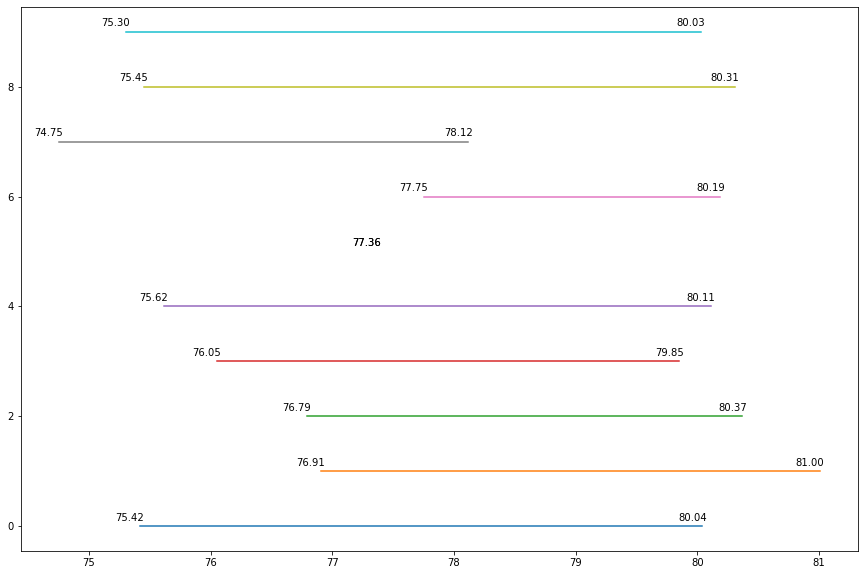

In [39]:
# draw comfort zone
for i in range(len(t_min)):
    plt.plot([t_min[i], t_max[i]],[i, i])
    
# tag comfort zone min $ max
for i in range(len(t_min)):
    plt.text(t_min[i]-0.2, i+0.1, "%.2f" % t_min[i])
    plt.text(t_max[i]-0.2, i+0.1, "%.2f" % t_max[i])

plt.show()

77.574
79.678
79.502
77.574
78.3615
82.686
80.382
76.876
78.449
78.449


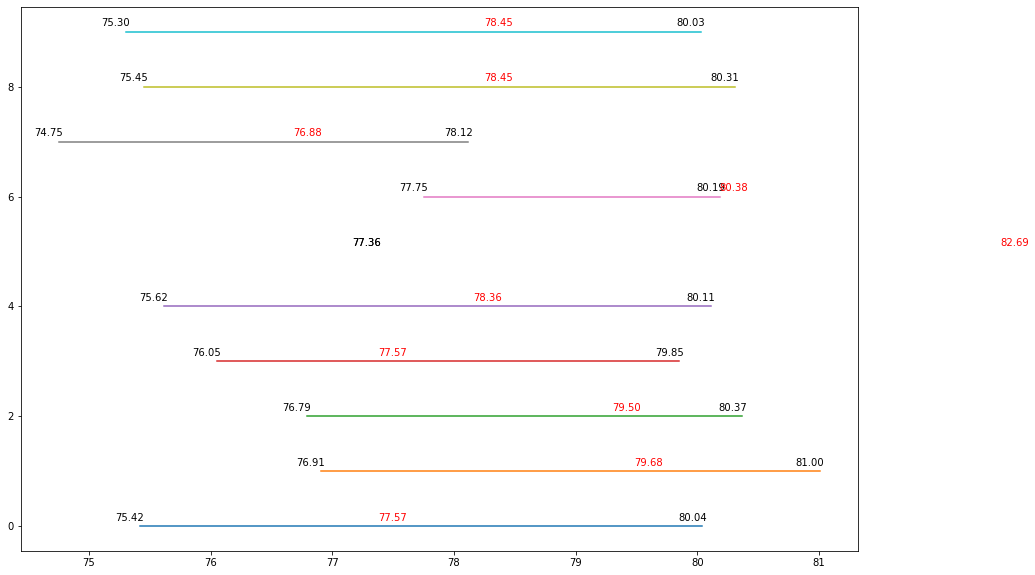

In [40]:
# draw comfort zone
for i in range(len(t_min)):
    plt.plot([t_min[i], t_max[i]],[i, i])
    
# tag comfort zone min $ max
for i in range(len(t_min)):
    plt.text(t_min[i]-0.2, i+0.1, "%.2f" % t_min[i])
    plt.text(t_max[i]-0.2, i+0.1, "%.2f" % t_max[i])
    
# tag real env tempreture
if len(t_min) == len(y_real):
    for i in range(len(y_real)):
        print(y_real[i])
        plt.text(y_real[i]-0.2, i+0.1, "%.2f" % y_real[i], {'color': 'red'})

plt.show()

## predict group tempreture model

In [145]:
import math

class OptimalGroupTempreture():
    def __init__(self, minTs, maxTs, sensitivity=1.0, defaultMinMaxRange=1.0):
        """
        sensitivity > 0, less means more sensitive
        defaultMinMaxRange > 0 or == None
        """
        if len(minTs) != len(maxTs):
            print('Length of min tempreture records and max tempretur records are not equal!')
            return None
        self.minTs = minTs
        self.maxTs = maxTs
        self.sensitivity = sensitivity
        self.defaultMinMaxRange = defaultMinMaxRange
    
    def getTempreture(self, model='auto', sensitivePeoplePercentageLimit=0.1, sensitiveRange=2, ppd=0.1):
        """
        model = 'auto', 'sensitive first', 'otd model'
        sensitivePeoplePercentage is > 0 and < 1
        sensitiveRange is > 0, unit is Fahrenheit Degree
        ppd: only for OTD model
        """
        minTs = self.minTs
        maxTs = self.maxTs

        if self.defaultMinMaxRange is not None:
            avgTs = [(maxTs[i] + minTs[i]) / 2 for i in range(len(minTs))]
            tRanges = [maxTs[i] - minTs[i] for i in range(len(minTs))]
            checkedtRanges = []
            for i in range(len(tRanges)):
                t = tRanges[i] if tRanges[i] > 0 else self.defaultMinMaxRange
                checkedtRanges.append(t)
        else:
            avgTs = []
            tRanges = [maxTs[i] - minTs[i] for i in range(len(minTs))]
            checkedtRanges = []
            for i in range(len(tRanges)):
                if tRanges[i] > 0:
                    t = tRanges[i]
                    checkedtRanges.append(t)
                    avgTs.append((maxTs[i] + minTs[i]) / 2)

        # model selection
        if model == 'sensitive first':
            print('sensitive first model')
            targetTempreture = self.sensitiveFirst(checkedtRanges, avgTs)
        elif model == 'otd model':
            print('otd model')
            targetTempreture = self.otdModel(checkedtRanges, avgTs, ppd)
        elif model == 'auto':
            lengthOfSensitivePeople = len([tRange for tRange in checkedtRanges if tRange <= sensitiveRange])
            if lengthOfSensitivePeople / len(checkedtRanges) >= sensitivePeoplePercentageLimit:
                print('sensitive first model')
                print('sensitive people percentage:', lengthOfSensitivePeople / len(checkedtRanges))
                targetTempreture = self.sensitiveFirst(checkedtRanges, avgTs)
            else:
                print('otd model')
                targetTempreture = self.otdModel(checkedtRanges, avgTs, ppd)
                if targetTempreture is None:
                    print('otd model does not find a acceptable value, use sensitive first model')
                    targetTempreture = self.sensitiveFirst(checkedtRanges, avgTs)
        else:
            print('Wrong model')
            return None

        return targetTempreture

    def sensitiveFirst(self, checkedtRanges, averageTs):
        weights = [self.computeWeight(tRange) for tRange in checkedtRanges]
        weightedTs = [averageTs[i] * weights[i] for i in range(len(averageTs))]
        targetTempreture = sum(weightedTs) / sum(weights)
        return targetTempreture

    def computeWeight(self, tRange):
        return (1 / tRange) ** self.sensitivity

    def otdModel(self, checkedtRanges, averageTs, ppd):
        numberOfPeople = len(checkedtRanges)
        permitNumberOfUncomfortablePeople = math.floor(numberOfPeople * ppd)
        otdMax = (numberOfPeople - permitNumberOfUncomfortablePeople) * 1 + \
            permitNumberOfUncomfortablePeople * (numberOfPeople + 1)

        rangeTs = [self.otdDecideComfortness(checkedtRanges[i], averageTs[i]) for i in range(len(checkedtRanges))]

        # find minT and maxT
        minT = min([averageTs[i] - checkedtRanges[i] / 2 for i in range(len(checkedtRanges))])
        maxT = max([averageTs[i] + checkedtRanges[i] / 2 for i in range(len(checkedtRanges))])

        acceptableTs = []
        for t10 in range(int(minT * 10), int(maxT * 10) + 1):
            t = t10 / 10
            otd = 0
            for x in rangeTs:
                if t >= x[0][0] and t <= x[0][1]:
                    otd += 0
                elif t >= x[1][0] and t <= x[1][1]:
                    otd += 1
                elif t >= x[2][0] and t <= x[2][1]:
                    otd += numberOfPeople + 1
                else:
                    otd = (numberOfPeople + 1) * 2
            if otd <= otdMax:
                acceptableTs.append([t, otd])
        if acceptableTs == []:
            return None
        acceptableTs.sort(key=lambda x: x[1])
        maxValues = [acceptableTs[0][0]]
        for i in range(1, len(acceptableTs)):
            if acceptableTs[i][1] == acceptableTs[0][1]:
                maxValues.append(acceptableTs[i][0])
        # print(acceptableTs)
        return sum(maxValues) / len(maxValues)

                
    def otdDecideComfortness(self, checkedtRange, averageT, \
                            littleUncomfortable=[1 , 1.4], \
                            uncomfortable=[1.4, 1.7]):
        radius = checkedtRange / 2
        rangeComfortable = [averageT - radius * littleUncomfortable[0], averageT + radius * littleUncomfortable[0]]
        rangeLittleUncomfortable = [averageT - radius * littleUncomfortable[1], averageT + radius * littleUncomfortable[1]]
        rangeUncomfortable = [averageT - radius * uncomfortable[1], averageT + radius * uncomfortable[1]]
        return [rangeComfortable, rangeLittleUncomfortable, rangeUncomfortable]

In [146]:
ogt = OptimalGroupTempreture(y_pred_min, y_pred_max, defaultMinMaxRange=None)

In [147]:
ogt.getTempreture(sensitiveRange=4)

sensitive first model
sensitive people percentage: 0.4444444444444444


78.05525258238838

In [150]:
ogt.getTempreture(model='otd model', ppd=0.1)

otd model


77.94999999999999